<a href="https://colab.research.google.com/github/LulyaHaile/ds2003/blob/main/DS_2003_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
df = pd.read_csv("diabetes_dataset.csv", on_bad_lines='skip')

In [11]:
print(df.shape)

(100000, 31)


**Visualization 1**

In [12]:
# Calculate correlations with diabetes_risk_score
medical_vars = ['glucose_fasting', 'hba1c', 'family_history_diabetes',
                'age', 'systolic_bp', 'bmi', 'insulin_level', 'glucose_postprandial']
lifestyle_vars = ['physical_activity_minutes_per_week', 'alcohol_consumption_per_week',
                  'sleep_hours_per_day', 'diet_score', 'screen_time_hours_per_day']

# Clean all columns - strip whitespace if string, convert to numeric
for col in lifestyle_vars + medical_vars + ['diabetes_risk_score']:
    if df[col].dtype == 'object':  # If it's a string column
        df[col] = df[col].astype(str).str.strip()  # Remove whitespace
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

# Drop rows with NaN in diabetes_risk_score
df = df.dropna(subset=['diabetes_risk_score'])

# Calculate correlations
medical_corr = {var: df[var].corr(df['diabetes_risk_score']) for var in medical_vars}
lifestyle_corr = {var: df[var].corr(df['diabetes_risk_score']) for var in lifestyle_vars}

# Prepare data for plotting
medical_df = pd.DataFrame({
    'Variable': list(medical_corr.keys()),
    'Correlation': list(medical_corr.values()),
    'Category': 'Medical/Physiological'
})

lifestyle_df = pd.DataFrame({
    'Variable': list(lifestyle_corr.keys()),
    'Correlation': list(lifestyle_corr.values()),
    'Category': 'Lifestyle/Socioeconomic'
})

# Combine and sort
combined_df = pd.concat([medical_df, lifestyle_df])
combined_df = combined_df.sort_values('Correlation', ascending=True)

# Create interactive bar chart
fig = go.Figure()

# Add medical/physiological bars
medical_data = combined_df[combined_df['Category'] == 'Medical/Physiological']
fig.add_trace(go.Bar(
    y=medical_data['Variable'],
    x=medical_data['Correlation'],
    name='Medical/Physiological',
    orientation='h',
    marker=dict(color='#3498db'),
    hovertemplate='<b>%{y}</b><br>Correlation: %{x:.3f}<extra></extra>'
))

# Add lifestyle/socioeconomic bars
lifestyle_data = combined_df[combined_df['Category'] == 'Lifestyle/Socioeconomic']
fig.add_trace(go.Bar(
    y=lifestyle_data['Variable'],
    x=lifestyle_data['Correlation'],
    name='Lifestyle/Socioeconomic',
    orientation='h',
    marker=dict(color='#e67e22'),
    hovertemplate='<b>%{y}</b><br>Correlation: %{x:.3f}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Correlation of Factors with Diabetes Risk Score:<br>Medical vs. Lifestyle Factors',
    xaxis_title='Correlation with Diabetes Risk Score',
    yaxis_title='Variable',
    barmode='group',
    height=600,
    width=1000,
    hovermode='closest',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template='plotly_white'
)

fig.show()
fig.write_html('visualization1_interactive_correlation.html')  # Optional: save as HTML

**Visualization 2**

/tmp/ipython-input-18903240.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-18903240.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-18903240.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




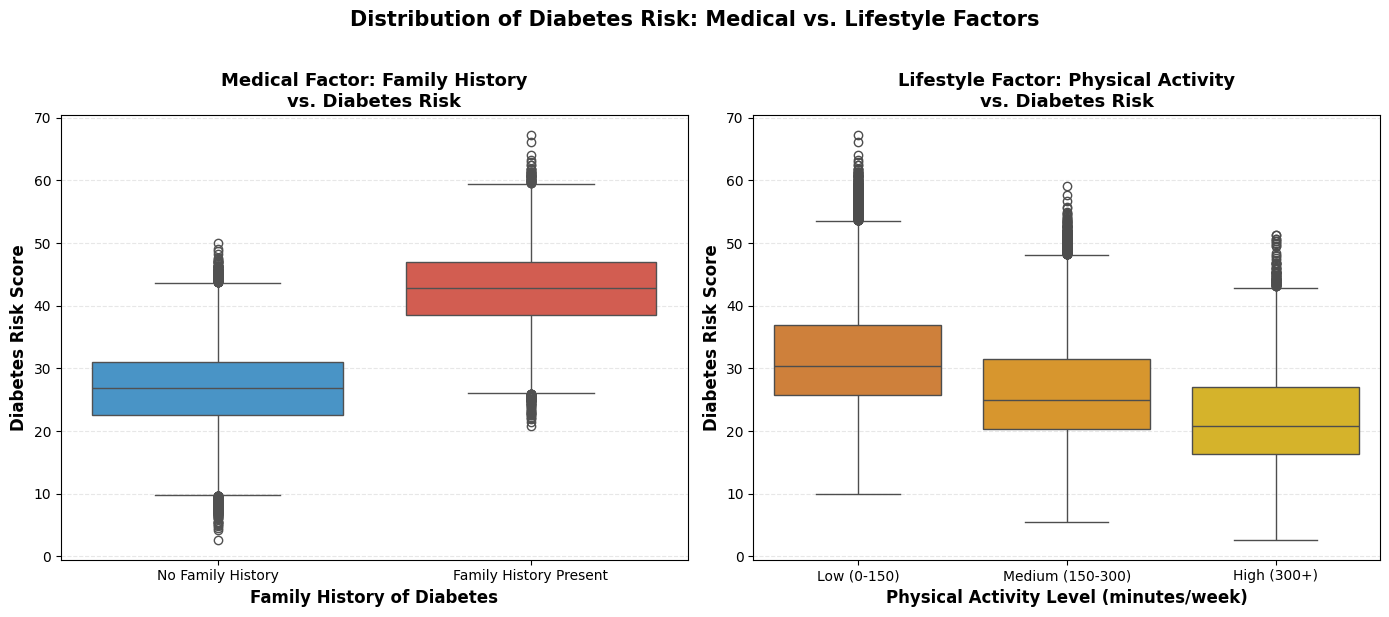

In [13]:
# Create bins for physical activity
df['physical_activity_category'] = pd.cut(
    df['physical_activity_minutes_per_week'],
    bins=[0, 150, 300, 600],
    labels=['Low (0-150)', 'Medium (150-300)', 'High (300+)']
)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Family History vs Diabetes Risk Score
sns.boxplot(
    data=df,
    x='family_history_diabetes',
    y='diabetes_risk_score',
    ax=axes[0],
    palette=['#3498db', '#e74c3c']
)
axes[0].set_xlabel('Family History of Diabetes', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Diabetes Risk Score', fontsize=12, fontweight='bold')
axes[0].set_title('Medical Factor: Family History\nvs. Diabetes Risk', fontsize=13, fontweight='bold')
axes[0].set_xticklabels(['No Family History', 'Family History Present'])
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Plot 2: Physical Activity vs Diabetes Risk Score
sns.boxplot(
    data=df,
    x='physical_activity_category',
    y='diabetes_risk_score',
    ax=axes[1],
    palette=['#e67e22', '#f39c12', '#f1c40f']
)
axes[1].set_xlabel('Physical Activity Level (minutes/week)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Diabetes Risk Score', fontsize=12, fontweight='bold')
axes[1].set_title('Lifestyle Factor: Physical Activity\nvs. Diabetes Risk', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add overall title
fig.suptitle('Distribution of Diabetes Risk: Medical vs. Lifestyle Factors',
             fontsize=15, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('visualization2_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

**Visualization 3**

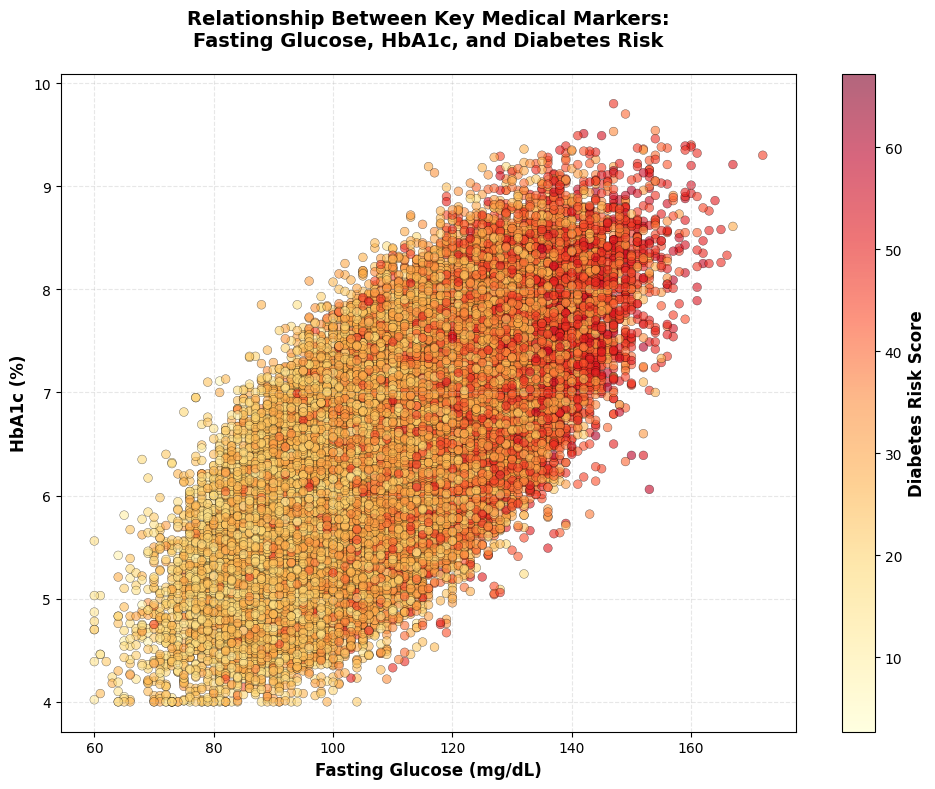

In [14]:
# Clean data
df['glucose_fasting'] = pd.to_numeric(df['glucose_fasting'], errors='coerce')
df['hba1c'] = pd.to_numeric(df['hba1c'], errors='coerce')
df['diabetes_risk_score'] = pd.to_numeric(df['diabetes_risk_score'], errors='coerce')

# Remove NaN values
df_clean = df.dropna(subset=['glucose_fasting', 'hba1c', 'diabetes_risk_score'])

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create scatter plot colored by diabetes risk score
scatter = ax.scatter(df_clean['glucose_fasting'],
                     df_clean['hba1c'],
                     c=df_clean['diabetes_risk_score'],
                     cmap='YlOrRd',
                     alpha=0.6,
                     s=40,
                     edgecolors='black',
                     linewidth=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Diabetes Risk Score', fontsize=12, fontweight='bold')

# Labels and title
ax.set_xlabel('Fasting Glucose (mg/dL)', fontsize=12, fontweight='bold')
ax.set_ylabel('HbA1c (%)', fontsize=12, fontweight='bold')
ax.set_title('Relationship Between Key Medical Markers:\nFasting Glucose, HbA1c, and Diabetes Risk',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('visualization3_medical_factors.png', dpi=300, bbox_inches='tight')
plt.show()